Importing Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Processing

In [4]:
1# loading the data from csv file to a Pandas Dataframe
calories=pd.read_csv('/content/sample_data/calories.csv')

In [5]:
1# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise_data=pd.read_csv('/content/sample_data/exercise.csv')

In [7]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [8]:
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [9]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
1# Checking the number of rows and columns
calories_data.shape

(15000, 9)

In [11]:
1# Getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
1# Checking for missing values 
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [13]:
1# get some statistical measures about the data 
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [14]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


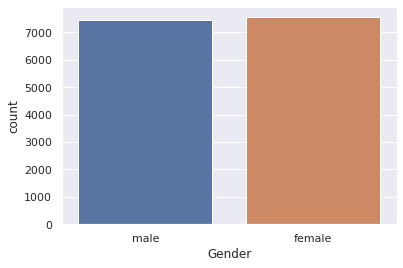

In [15]:
1#plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


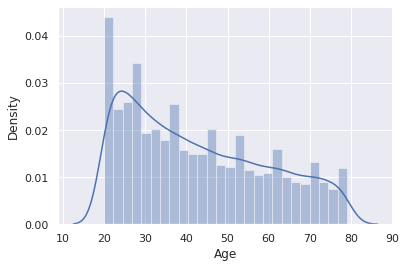

In [16]:
1# finding the distribution of 'Age' column
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


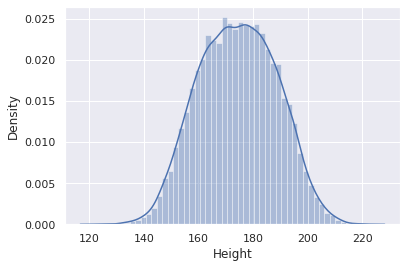

In [17]:
1# finding the distribution of 'Height' column
sns.distplot(calories_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


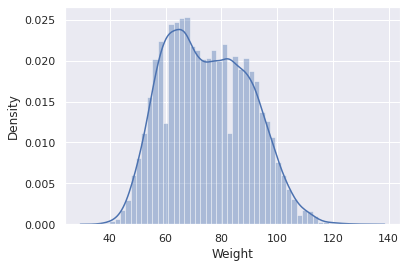

In [18]:
1# finding the distribution of 'Weight' column
sns.distplot(calories_data['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


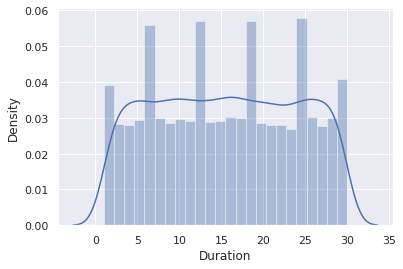

In [19]:
1# finding the distribution of 'Duration' column
sns.distplot(calories_data['Duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


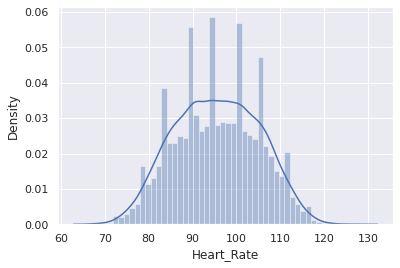

In [20]:
1# finding the distribution of 'Heart_Rate' column
sns.distplot(calories_data['Heart_Rate'])

Finding the Correlation in the dataset

1.Positive Correlation     
2.Negative Correlation

In [21]:
correlation = calories_data.corr()

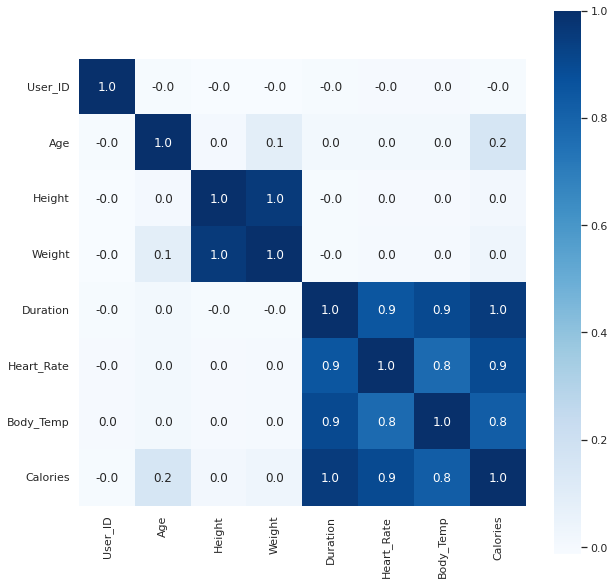

In [22]:
1# constructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True, cmap='Blues')

Converting the text data in 'Gender' column to numerical values

In [23]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [24]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating features and Target

In [25]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [26]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [27]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

Splitting the data into training data and Test data

In [28]:
X_train, X_test, Y_train , Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [30]:
#loading the model 
model=XGBRegressor()

In [31]:
1# training the model with X_train
model.fit(X_train,Y_train)

[11:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

Prediction on Test Data

In [32]:
test_data_prediction=model.predict(X_test)

In [33]:
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


Mean Absolute Error

In [34]:
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [35]:
print("Mean Absolute Error= ", mae)

Mean Absolute Error=  2.7159012502233186


Using Linear Regression Model

Importing Linear Regression Model 

In [36]:
from sklearn.linear_model import LinearRegression

As we have already converted the categorical gender column and selected the featueres along with target also we have splitted our data into training and testing data hence doing model training using linear regression. 

Performing Standardisation 

In [37]:
#Standardizing
from sklearn.preprocessing import StandardScaler

In [38]:
sc=StandardScaler()

In [39]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
# loading the linear regression model 
reg=LinearRegression()

Training our Linear Rigression Model to find the equation of our linear regression model ( i.e y=mx+c ) 

In [41]:
reg.fit(X_train,Y_train)

LinearRegression()

Model Evaluation 

In [42]:
#prediction on testing data
Y_pred=reg.predict(X_test)

Comparing the Values predicted by our model by using r squared error 

In [43]:
metrics.r2_score(Y_test,Y_pred)

0.9668790377181355

Visualising the the actaul calories burnt and the Predicted Calories burnt 

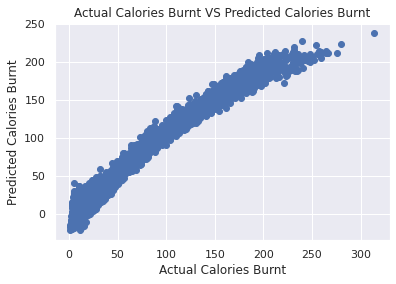

In [44]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual Calories Burnt VS Predicted Calories Burnt")
plt.show()

Using Random Forest Regressor Model

In [45]:
#importing random forest regressor model 
from sklearn.ensemble import RandomForestRegressor

Loading RandomForestRegressor to RandomForest variable.

In [46]:
RandomForest=RandomForestRegressor(n_estimators=100)

Training the Model 

In [47]:
RandomForest.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [48]:
#Evaluating?Predicting on test data
Y_pred=RandomForest.predict(X_test)

In [49]:
Y_pred

array([129.31, 222.12,  36.73, ..., 146.62,  23.94,  89.48])

Using R square metric for evaluation

In [51]:
error_score =metrics.r2_score(Y_test,Y_pred)
print("Rsquared Error Score = " , error_score)

Rsquared Error Score =  0.9981758119689808


Visualising the acual calories burnt and the predicted calories burnt

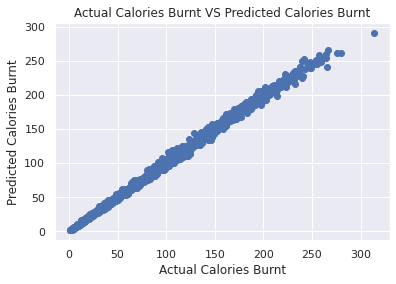

In [52]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Actual Calories Burnt VS Predicted Calories Burnt")
plt.show()

Visualising the same in a plot 

In [53]:
#Coverting  Y_test into a list otherwise it can give error while we are plotting 
Y_testlist=list(Y_test)

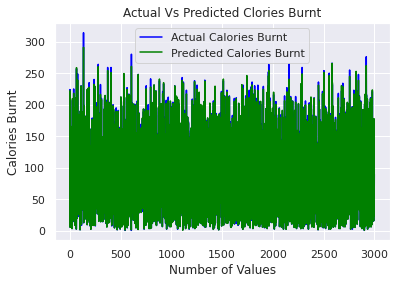

In [55]:
#plotting the actual calories burnt (Y_testlist) in blue color and the predicted calories burnt (Y_pred) in green color
plt.plot(Y_testlist, color="blue", label = 'Actual Calories Burnt')
plt.plot(Y_pred, color="green", label = 'Predicted Calories Burnt')
plt.title("Actual Vs Predicted Clories Burnt")
plt.xlabel("Number of Values")
plt.ylabel("Calories Burnt")
plt.legend()
plt.show()

We conclude that the actual price is slightly more than the predicted value which is nothing more than our 0.99 error obtained in our R squared score. Hence Random Forest Regressor Algorithm is best suited for our current ML model which predicts the calories burnt while doing exercise.  